<a href="https://colab.research.google.com/github/JamileSantos/Modelos_Ciencia_de_Dados/blob/master/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Algoritmo Perceptron**




In [0]:
# Algoritmo Perceptron 
# @author: Jamile Santos

import matplotlib.pyplot as plt
import numpy as np
import math
import random

from scipy.special import expit

%matplotlib inline

# Data to train the model

tam = 20

# Generatin a random data
A = np.random.multivariate_normal([0,0]  , [[1,0],[0,1]], tam)
B = np.random.multivariate_normal([5,5], [[1,0],[0,1]], tam)

# Join the both data into a vector
AB  = np.concatenate((A,B))
# Label of the train data
labels_AB = np.concatenate((-1*np.ones((tam,1)), np.ones((tam,1))))

# Choosing randomly the weight of the perceptron model
# W ={w_0=threshold, w_1= weiht_1, w_2=weiht2}
W   = np.matrix([[-1*random.random(), random.random(), random.random()]])

# Good choice of weight
# [[-0.99402716  0.61614909  0.50627006]]

In [0]:
# Function Perceptron
def perceptron (X, W, sig=True):
    # Input: Data and Weight as column vector
    # Data is Nxd matrix -> N samples, d features
    # Weight is 1x(d+1)
    
    # Ajust to operation matrix, insert into 1st column, to ajust matrix mult
    X = np.insert(X, 0, 1. ,axis=1)
    
    # Multiply the enter data by weight and sum it
    # X_{Nx(d+1)} x (W_{1x(d+1)}^T)_{(d+1,1)} = U_{Nx1}
    U = np.matrix(X) * (np.matrix(W).transpose())
    
    # Apply the activation fuction
    # Sigmoid = Logistic or Tanh
    if sig:
        A = expit(U)
        return [1.0 if j > 0.5 else -1.0 for j in A]
    else:
        A = np.tanh(U)
        return [1.0 if j > 0 else -1.0 for j in A]

In [0]:
# Fitting the weights
def fit_perceptron(X, labels, W, learn=0.001, epoc=100, func=True):
    
    error = math.inf
    rnd   = 0
    X  = np.matrix(X)
    W  = np.matrix(W)
    
    while error > 0 and rnd < epoc:
        rnd += 1
        
        y     = perceptron(X, W, func)
        
        # Build a list of differences between labels and output of perceptron
        # -2 when the label is -1 and output is +1
        #  0 when the label is equal to output
        # +2 when the label is 1 and output is -1
        erros = [labels[i] - y[i] if y[i] != labels[i] else 0. for i in range(len(y))]
        
        erros = np.array(erros)
        # Building the updated factor of W:
        # multiply the errors by the factor of learning
        # w_update_{Nx1}
        w_update = (np.matrix([learn * erros])).transpose()
        
        
        W_up1 =  np.diagflat(w_update) * X[:,0]
        W_up2 =  np.diagflat(w_update) * X[:,1]
        
        W[0,0] += np.sum(erros) * learn
        W[0,1] += np.sum(W_up1)
        W[0,2] += np.sum(W_up2)
        
        error = np.max(erros) - np.min(erros)
    return W
        

In [0]:
# Block to implement the plotting data (Visualization)
def line_perceptron(W, x):
    b  = W[0,0]
    w1 = W[0,1]
    w2 = W[0,2]
    
    # y = (-(b / w2) / (b / w1))x + (-b / w2)
    m = (-(b / w2) / (b / w1))
    c = (-b / w2)

    return (m*x+c)

def pontos_perceptron(X, W):
    xmin_idx = np.argmin(X[:,0])
    xmax_idx = np.argmax(X[:,0])
    ymin_idx = np.argmin(X[:,1])
    ymax_idx = np.argmax(X[:,1])
    
    # line formulation
    # y = m.x + b
    m = (-(W[0,0] / W[0,2]) / (W[0,0] / W[0,1]))
    b = (-W[0,0] / W[0,2])
    
    y1 = X[ymin_idx,1]
    y2 = X[ymax_idx,1]

    x1 = (y1 - b)/m
    x2 = (y2 - b)/m
    
    
    return([[x1,x2],[y1,y2]])

    

def plot_perceptron(X, W, y, mark='o', mark_cor=['blue', 'red', 'black'], line_cor='blue'):
    cols1=[]
    for l in y:
        if   l<0:
            cols1.append(mark_cor[0])
        elif l>0:
            cols1.append(mark_cor[1])
        else:
            cols1.append(mark_cor[2])
    
    [Px, Py] = pontos_perceptron(X, W)
    plt.plot(Px,Py, c=line_cor)

    plt.scatter(X[:,0], X[:,1], marker=mark,  c=cols1, s=80,linewidths=1, edgecolors=cols1)
    plt.grid()
    plt.show()

Perceptron by tanh function and random weight


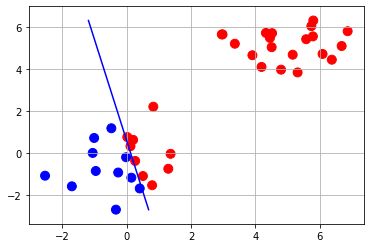

Perceptron by logist function and random weight


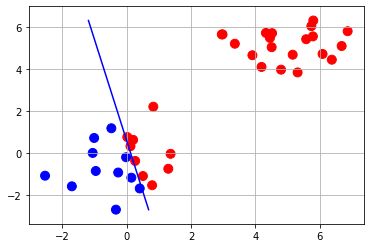

Perceptron by logistic function and fitted weight


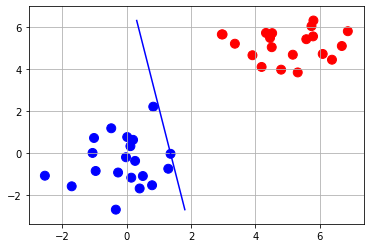

Perceptron by tanh function and fitted weight


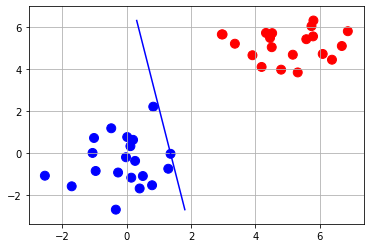

Real labels


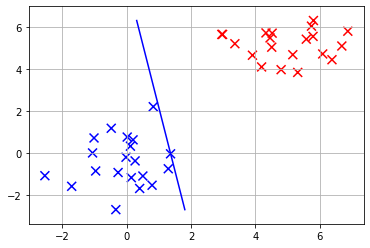

In [0]:
R1 = perceptron (AB, W, False)
R2 = perceptron (AB,W)

print("Perceptron by tanh function and random weight")
plot_perceptron(AB, W, R1)
print("Perceptron by logist function and random weight")
plot_perceptron(AB, W, R2)

# Find the best weights
W_star1 = fit_perceptron(AB, labels_AB, W, func=False)
y_AB1   = perceptron(AB, W_star1)

W_star2 = fit_perceptron(AB, labels_AB, W, func=True)
y_AB2   = perceptron(AB, W_star2)

print("Perceptron by logistic function and fitted weight")
plot_perceptron(AB, W_star2, y_AB2)
print("Perceptron by tanh function and fitted weight")
plot_perceptron(AB, W_star1, y_AB1)

print("Real labels")
plot_perceptron(AB, W_star1, labels_AB, mark='x')

